In [188]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

# Prepare data to share with countries

In [139]:
gendata = pd.read_csv('data/sapp/epm_data/pGenDataExcelCustom.csv')
availability = pd.read_csv('data/sapp/epm_data/pAvailabilityCustomUpdated.csv')
df = gendata.merge(availability, how='left', on='gen')
df

,gen,zone,tech,fuel,StYr,RetrYr,Capacity,Status,MinLimitShare,HeatRate,...,DescreteCap,fuel2,HeatRate2,MinUtilization,RETech,UnitSize,Q1,Q2,Q3,Q4
0,Acacia_TH_ZAF,South_Africa,OCGT,HFO,1976.0,2026.0,171.0,1.0,NaN,11.261014,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Agg_THICE1_ZAR,DRC,ICE,HFO,2000.0,2050.0,20.7,1.0,NaN,10.415447,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Agg_THICE2_ZAR,DRC,ICE,HFO,2000.0,2050.0,124.4,1.0,NaN,10.415447,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,AggDiesel_TH_MOZ,Mozambique,ICE,HFO,2000.0,2050.0,48.0,1.0,NaN,13.621268,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Aggreko_IPP_ICE_MWI,Malawi,ICE,Diesel,2000.0,2019.0,0.0,1.0,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,SA_WindPrivate26_REN_ZAF,South_Africa,OnshoreWind,Wind,2025.0,2060.0,964.0,2.0,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
486,SA_WindPrivate27_REN_ZAF,South_Africa,OnshoreWind,Wind,2025.0,2060.0,2847.0,2.0,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
487,SA_WindPrivate28_REN_ZAF,South_Africa,OnshoreWind,Wind,2025.0,2060.0,700.0,2.0,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
488,SA_WindPrivate29_REN_ZAF,South_Africa,OnshoreWind,Wind,2025.0,2060.0,784.0,2.0,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [140]:
country = 'Mozambique'
df_hydro = df[['gen', 'zone', 'fuel', 'Q1', 'Q2', 'Q3', 'Q4']]
df_hydro = df_hydro.loc[(df_hydro.zone == country) & (df_hydro.fuel == 'Water')]
df_hydro.to_csv(f'data/sapp/data_to_share/hydro_availability_{country}.csv', index=False) 

# Load data

In [38]:
# Put data in good format

country = 'Namibia'
load_profile = pd.read_csv('data/sapp/raw_data/load/load_profile_2023_namibia.csv')
load_profile = load_profile.set_index(['Year', 'Month', 'Day']).stack().to_frame().rename(columns={0: 2023})
load_profile.index.names = ['Year', 'Month', 'Day', 'hour']

years = list(range(2000, 2033))
load_profile = pd.concat([load_profile[2023]] * len(years), axis=1)
load_profile.columns = years
load_profile.reset_index(inplace=True) 
load_profile = load_profile.rename(columns={'Year': 'year', 'Month': 'month', 'Day': 'day', 'hour': 'hour'})
load_profile['zone'] = 'Namibia'
load_profile

,year,month,day,hour,2000,2001,2002,2003,2004,2005,...,2024,2025,2026,2027,2028,2029,2030,2031,2032,zone
0,2023,1,1,1,0.571221,0.571221,0.571221,0.571221,0.571221,0.571221,...,0.571221,0.571221,0.571221,0.571221,0.571221,0.571221,0.571221,0.571221,0.571221,Namibia
1,2023,1,1,2,0.566798,0.566798,0.566798,0.566798,0.566798,0.566798,...,0.566798,0.566798,0.566798,0.566798,0.566798,0.566798,0.566798,0.566798,0.566798,Namibia
2,2023,1,1,3,0.524017,0.524017,0.524017,0.524017,0.524017,0.524017,...,0.524017,0.524017,0.524017,0.524017,0.524017,0.524017,0.524017,0.524017,0.524017,Namibia
3,2023,1,1,4,0.517701,0.517701,0.517701,0.517701,0.517701,0.517701,...,0.517701,0.517701,0.517701,0.517701,0.517701,0.517701,0.517701,0.517701,0.517701,Namibia
4,2023,1,1,5,0.516675,0.516675,0.516675,0.516675,0.516675,0.516675,...,0.516675,0.516675,0.516675,0.516675,0.516675,0.516675,0.516675,0.516675,0.516675,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023,12,31,20,0.717182,0.717182,0.717182,0.717182,0.717182,0.717182,...,0.717182,0.717182,0.717182,0.717182,0.717182,0.717182,0.717182,0.717182,0.717182,Namibia
8756,2023,12,31,21,0.778699,0.778699,0.778699,0.778699,0.778699,0.778699,...,0.778699,0.778699,0.778699,0.778699,0.778699,0.778699,0.778699,0.778699,0.778699,Namibia
8757,2023,12,31,22,0.733660,0.733660,0.733660,0.733660,0.733660,0.733660,...,0.733660,0.733660,0.733660,0.733660,0.733660,0.733660,0.733660,0.733660,0.733660,Namibia
8758,2023,12,31,23,0.667723,0.667723,0.667723,0.667723,0.667723,0.667723,...,0.667723,0.667723,0.667723,0.667723,0.667723,0.667723,0.667723,0.667723,0.667723,Namibia


In [39]:
# Group months into seasons
seasons_dict = {
    1: 1,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 2,
    7: 3,
    8: 3,
    9: 3,
    10: 4,
    11: 4,
    12: 4
}  # grouping months into 4 seasons, to define according to user

load_profile['season'] = load_profile.apply(lambda row: seasons_dict[row['month']], axis=1)
load_profile = load_profile.sort_values(by=['season', 'month', 'day', 'hour'])
load_profile = load_profile[~((load_profile['month'] == 2) & (load_profile['day'] == 29))]
# Renumber days sequentially within each season
load_profile['season_day'] = load_profile.groupby(['zone', 'season']).cumcount() // 24 + 1

load_profile = load_profile.drop(columns=['day']).rename(columns={'season_day': 'day'})
load_profile = load_profile.set_index(['zone', 'season', 'day', 'hour']).reset_index().drop(columns=['month'])
load_profile = load_profile.sort_values(by=['zone', 'season', 'day', 'hour'])
load_profile

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92])

# Hydro data

In [189]:
country = 'Namibia'
ruacana = pd.read_csv('data/sapp/raw_data/hydro/energy_RuacanaROR.csv')
ruacana.set_index(['year', 'month', 'day'], inplace=True)
baynes = pd.read_csv('data/sapp/raw_data/hydro/energy_baynes.csv')
baynes.set_index(['year', 'month', 'day'], inplace=True)

ruacana = ruacana.stack().to_frame().rename(columns={0: 'ruacana'})
ruacana.index.names = ['year', 'month', 'day', 'hour']

baynes = baynes.stack().to_frame().rename(columns={0: 'baynes'})
baynes.index.names = ['year', 'month', 'day', 'hour']

hydro_namibia = pd.concat([ruacana, baynes], axis=1)
hydro_namibia = hydro_namibia[~((hydro_namibia.index.get_level_values('month') == 2) & 
          (hydro_namibia.index.get_level_values('day') == 29))]  # remove 29th of February


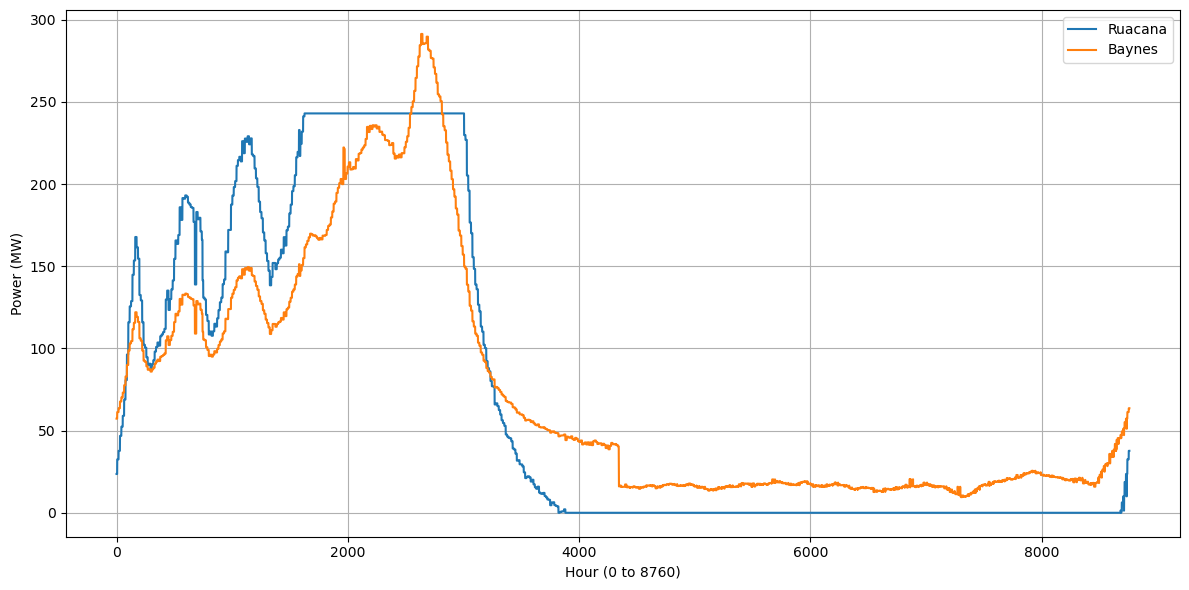

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['ruacana'], label='Ruacana')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes'], label='Baynes')
plt.xlabel('Hour (0 to 8760)')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Optimization program for Baynes

In [190]:
inflow = hydro_namibia[['baynes']].copy().reset_index()
inflow = inflow.loc[~((inflow.month == 2) & (inflow.day == 29))]  # dropping the 29th February
# inflow.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
# inflow = inflow.squeeze().values 

In [192]:
inflow.to_csv('data/sapp/raw_data/hydro/baynes_inflows.csv') 

In [179]:
inflow.loc[((inflow.month == 2) & (inflow.day == 29))]

,year,month,day,hour,baynes
1392,2020,2,29,t1,114.8952
1393,2020,2,29,t2,114.8952
1394,2020,2,29,t3,114.8952
1395,2020,2,29,t4,114.8952
1396,2020,2,29,t5,114.8952
1397,2020,2,29,t6,114.8952
1398,2020,2,29,t7,115.8360
1399,2020,2,29,t8,115.8360
1400,2020,2,29,t9,115.8360
1401,2020,2,29,t10,115.8360


### First method, smoothing dispatch

In [47]:
# Initial version, smoothing variation between hours

import numpy as np
from scipy.optimize import linprog
from scipy.sparse import lil_matrix

# Input: inflow dataframe (replace this with your actual input)
# Assume 8760 hours (1 year)
hours = 8760
# inflow = np.random.rand(hours) * 100  # example inflow in MWh

# Parameters
reservoir_max = 204
min_storage = 0.01 * reservoir_max
seasonal_hours = np.arange(3 * 30 * 24, 6 * 30 * 24)  # approx hours for Apr-Jun

# Variables: [i_t, o_t, s_t, d_t, u_t] for t in 0..T-1 → total 5*T variables
n = hours
n_var = 5 * n

# Objective: minimize sum(u_t)
c = np.zeros(n_var)
c[4::5] = 1  # u_t terms

# Bounds
bounds = [(0, None), (0, None), (0, reservoir_max), (0, None), (0, None)] * n

# Equality constraints (storage & dispatch)
A_eq = lil_matrix((2 * n, n_var))
b_eq = np.zeros(2 * n)

for t in range(n):
    # Storage equation: s_t - s_{t-1} - i_t + o_t = 0
    A_eq[t, 5*t + 2] = 1     # s_t
    A_eq[t, 5*t + 0] = -1    # i_t
    A_eq[t, 5*t + 1] = 1     # o_t
    if t > 0:
        A_eq[t, 5*(t-1) + 2] = -1  # s_{t-1}
    b_eq[t] = 0

    # Dispatch equation: d_t + i_t - o_t = inflow_t
    A_eq[n + t, 5*t + 3] = 1   # d_t
    A_eq[n + t, 5*t + 0] = 1   # i_t
    A_eq[n + t, 5*t + 1] = -1  # o_t
    b_eq[n + t] = inflow[t]

# Inequality constraints: abs variation using u_t
A_ub = lil_matrix((2*(n-1) + len(seasonal_hours), n_var))
b_ub = np.zeros(2*(n-1) + len(seasonal_hours))

row = 0
for t in range(1, n):
    # u_t >= d_t - d_{t-1} -> d_t - d_{t-1} - u_t <= 0
    A_ub[row, 5*t + 4] = -1      # u_t
    A_ub[row, 5*t + 3] = 1     # d_t
    A_ub[row, 5*(t-1) + 3] = -1  # d_{t-1}
    row += 1

    # u_t >= d_{t-1} - d_t -> d_{t-1} - d_t - u_t <= 0
    A_ub[row, 5*t + 4] = -1
    A_ub[row, 5*t + 3] = -1
    A_ub[row, 5*(t-1) + 3] = 1
    row += 1

# Seasonal constraints: s_t >= min_storage → -s_t <= -min_storage
for i, t in enumerate(seasonal_hours):
    A_ub[row + i, 5*t + 2] = -1  # -s_t
    b_ub[row + i] = -min_storage

# Solve LP
res = linprog(c, A_ub=A_ub.tocsr(), b_ub=b_ub, A_eq=A_eq.tocsr(), b_eq=b_eq,
              bounds=bounds, method='highs')

# Output result status
res.success, res.fun


(True, 748.074200615707)

In [55]:
new_inflow = res.x[3*n:4*n]
hydro_namibia['baynes_smoothed'] = new_inflow
hydro_namibia

/var/folders/q1/q3sbpxn50b5frhgsdn1cq0z80000gn/T/ipykernel_9867/1352089529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hydro_namibia['baynes_smoothed'] = new_inflow


ruacana   baynes  baynes_smoothed
year month day hour                                   
2020 1     1   t1       23.6  57.2712         0.000000
               t2       23.6  57.2712         0.927251
               t3       23.6  57.2712         1.854501
               t4       23.6  57.2712        15.627251
               t5       23.6  57.2712         0.000000
...                      ...      ...              ...
     12    31  t20      37.7  63.6216         0.885278
               t21      37.7  63.6216         0.000000
               t22      37.7  63.6216       156.038035
               t23      37.7  63.6216        15.990322
               t24      37.7  63.6216         0.000000

[8760 rows x 3 columns]

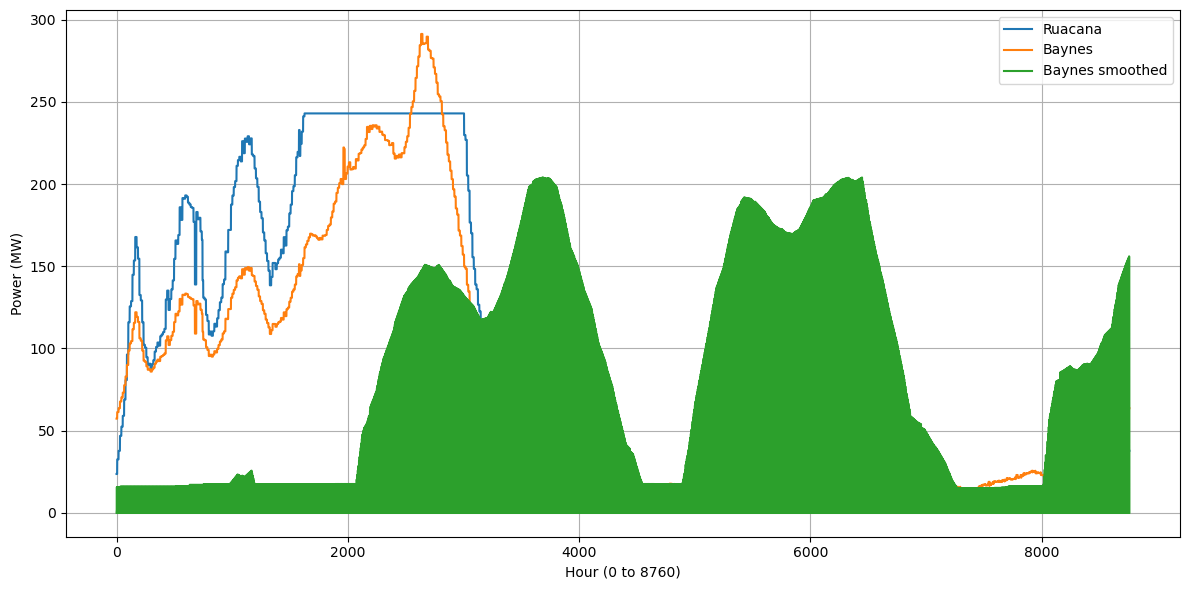

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['ruacana'], label='Ruacana')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes'], label='Baynes')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_smoothed'], label='Baynes smoothed')
plt.xlabel('Hour (0 to 8760)')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
res.x.shape 

(43800,)

### Second method: smoothing seasonal capacity factor

In [116]:
import numpy as np
from scipy.optimize import linprog
from scipy.sparse import lil_matrix

# Smoothing seasonal average 

# Parameters
hours = 8760
reservoir_max = 205000
min_storage = 0.6 * reservoir_max
seasonal_hours = np.arange(3 * 30 * 24, 6 * 30 * 24)  # Apr-Jun

# Variables: [i_t, o_t, s_t, d_t, D_j, U_j] for each hour, plus D1-D4, plus U1-U3
n = hours
n_var = 4 * n + 4 + 3  # hourly vars + seasonal dispatch sums + abs diffs

# Objective: minimize sum of U_j
c = np.zeros(n_var)
c[4 * n + 4:] = 1  # U1, U2, U3

# Bounds
bounds = [(0, None), (0, None), (0, reservoir_max), (0, None)] * n
bounds += [(0, None)] * 4  # D1-D4
bounds += [(0, None)] * 3  # U1-U3

# Equality constraints: storage + dispatch + seasonal sums
A_eq = lil_matrix((2 * n + 4, n_var))
b_eq = np.zeros(2 * n + 4)

for t in range(n):
    # Storage equation: s_t - s_{t-1} - i_t + o_t = 0
    if t > 0:
        A_eq[t-1, 4*t + 2] = 1     # s_t
        A_eq[t-1, 4*t + 0] = -1    # i_t
        A_eq[t-1, 4*t + 1] = 1     # o_t
        A_eq[t-1, 4*(t-1) + 2] = -1  # s_{t-1}

    # Dispatch equation: d_t + i_t - o_t = inflow_t
    A_eq[n-1 + t, 4*t + 3] = 1   # d_t
    A_eq[n-1 + t, 4*t + 0] = 1   # i_t
    A_eq[n-1 + t, 4*t + 1] = -1  # o_t
    b_eq[n-1 + t] = inflow[t]

# Equation to ensure storage level is the same at beginning and end
A_eq[2 * n - 1, 2] = 1
A_eq[2 * n - 1, 4 * (n-1) + 2] = -1

# Seasonal sum constraints: D_j = sum(d_t in season j)
season_length = n // 4
for j in range(4):
    for t in range(j * season_length, (j + 1) * season_length):
        A_eq[2 * n + j, 4*t + 3] = 1  # coefficients for each d_t in the season
    A_eq[2 * n + j, 4 * n + j] = -1  # subtract D_j
    b_eq[2 * n + j] = 0

# Inequality constraints
row_max = len(seasonal_hours) + 6
A_ub = lil_matrix((row_max, n_var))
b_ub = np.zeros(row_max)

row = 0

# Seasonal storage constraint: s_t >= min → -s_t <= -min
for t in seasonal_hours:
    A_ub[row, 4*t + 2] = -1
    b_ub[row] = -min_storage
    row += 1
    
# U_j >= |D_{j+1} - D_j|
for j in range(3):
    # D_{j+1} - D_j - U_j <= 0
    A_ub[row, 4*n + j + 1] = 1
    A_ub[row, 4*n + j] = -1
    A_ub[row, 4*n + 4 + j] = -1
    row += 1
    
    # D_{j} - D_{j+1} - U_j <= 0
    A_ub[row, 4*n + j] = 1
    A_ub[row, 4*n + j + 1] = -1
    A_ub[row, 4*n + 4 + j] = -1
    row += 1

# Solve
res2 = linprog(c, A_ub=A_ub.tocsr(), b_ub=b_ub[:row],
              A_eq=A_eq.tocsr(), b_eq=b_eq,
              bounds=bounds, method='highs')


# Output result status
res2.success, res2.fun


(True, 51014.109600000986)

In [117]:
# Checks
residual_eq = A_eq.dot(res2.x) - b_eq
print("Max absolute residual in A_eq:", np.max(np.abs(residual_eq)))
print("Storage start vs end:", res2.x[2], res2.x[4*(n-1) + 2])
print("Difference (should be ≈ 0):", res2.x[2] - res2.x[4*(n-1) + 2])
print("Check constraint row for s0 = s_end:", A_eq[2*n - 1].toarray())

Max absolute residual in A_eq: 4.0745362639427185e-10
Storage start vs end: -0.0 0.0
Difference (should be ≈ 0): -0.0
Check constraint row for s0 = s_end: [[0. 0. 1. ... 0. 0. 0.]]


In [118]:
new_inflow = res2.x[3 : 4*n : 4]
stored = res2.x[0 : 4*n : 4]  # what's getting in
out = res2.x[1 : 4*n : 4]  # what's getting out
storage = res2.x[2 : 4*n : 4] # storage level
hydro_namibia['baynes_smoothed_v2'] = new_inflow
hydro_namibia['baynes_storage'] = storage
hydro_namibia['baynes_stored'] = stored
hydro_namibia['baynes_out_of_storage'] = out

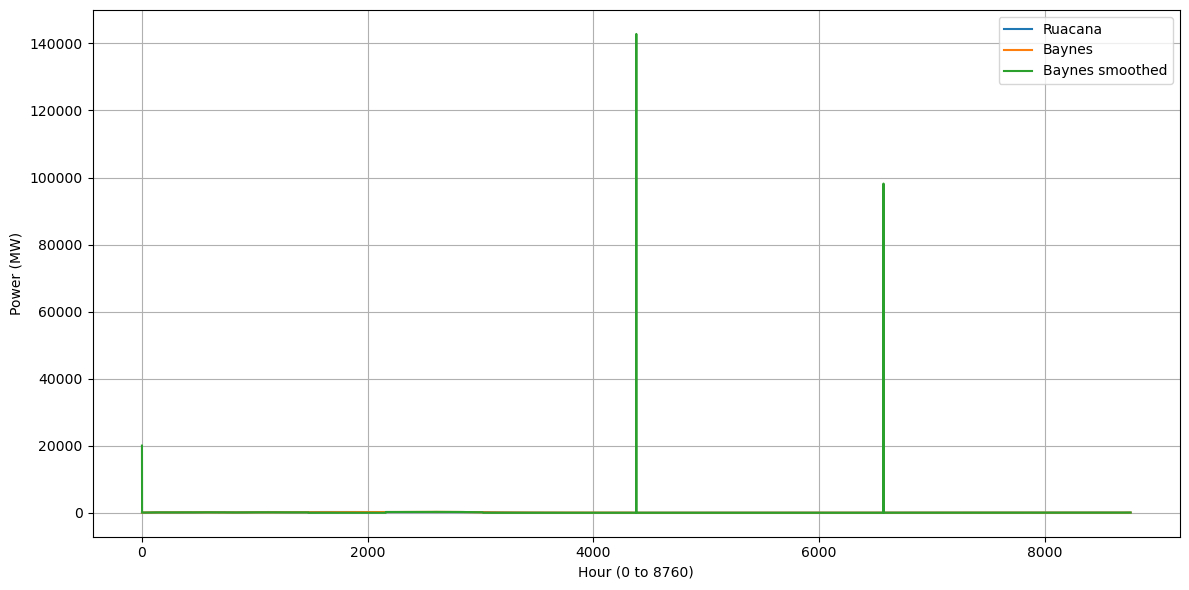

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['ruacana'], label='Ruacana')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes'], label='Baynes')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_smoothed_v2'], label='Baynes smoothed')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_storage'], label='Baynes storage')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_stored'], label='Baynes stored')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_out_of_storage'], label='Baynes out of storage')
plt.xlabel('Hour (0 to 8760)')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
seasons_dict = {
    1: 1,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 2,
    7: 3,
    8: 3,
    9: 3,
    10: 4,
    11: 4,
    12: 4
}  # grouping months into 4 seasons, to define according to user
hydro_namibia.reset_index(inplace=True)
hydro_namibia['season'] = hydro_namibia.apply(lambda row: seasons_dict[row['month']], axis=1)
hydro_namibia.groupby(['season'])[['baynes', 'baynes_smoothed_v2']].mean().reset_index()  # getting average capacity factor across seasons


,season,baynes,baynes_smoothed_v2
0,1,134.211000,86.627050
1,2,129.226408,91.842428
2,3,16.469726,64.689781
3,4,20.328689,64.689781


### Third method: smoothing both

In [141]:
# Smoothing the seasonal average, and between each hour

# Parameters
hours = 8760
reservoir_max = 205000  # in GWh
min_storage = 0.6 * reservoir_max
seasonal_hours = np.arange(3 * 30 * 24, 6 * 30 * 24)  # Apr-Jun

# Variables: [i_t, o_t, s_t, d_t, u_t, D_j, U_j] for each hour, plus D1-D4, plus U1-U3
n = hours
n_var = 5 * n + 4 + 3  # hourly vars + seasonal dispatch sums + abs diffs

# Objective: minimize sum of U_j
c = np.zeros(n_var)
c[5 * n + 4:] = 1  # U1, U2, U3
c[4 : 5*n : 5] = 1  # u_t terms

# Bounds
bounds = [(0, None), (0, None), (0, reservoir_max), (0, None), (0, None)] * n
bounds += [(0, None)] * 4  # D1-D4
bounds += [(0, None)] * 3  # U1-U3

# Equality constraints: storage + dispatch + seasonal sums
A_eq = lil_matrix((2 * n + 4, n_var))
b_eq = np.zeros(2 * n + 4)

for t in range(n):
    # Storage equation: s_t - s_{t-1} - i_t + o_t = 0
    if t > 0:
        A_eq[t-1, 5*t + 2] = 1     # s_t
        A_eq[t-1, 5*t + 0] = -1    # i_t
        A_eq[t-1, 5*t + 1] = 1     # o_t
        A_eq[t-1, 5*(t-1) + 2] = -1  # s_{t-1}

    # Dispatch equation: d_t + i_t - o_t = inflow_t
    A_eq[n-1 + t, 5*t + 3] = 1   # d_t
    A_eq[n-1 + t, 5*t + 0] = 1   # i_t
    A_eq[n-1 + t, 5*t + 1] = -1  # o_t
    b_eq[n-1 + t] = inflow[t]

# Equation to ensure storage level is the same at beginning and end
A_eq[2 * n - 1, 2] = 1
A_eq[2 * n - 1, 5 * (n-1) + 2] = -1

# Seasonal sum constraints: D_j = sum(d_t in season j)
season_length = n // 4
for j in range(4):
    for t in range(j * season_length, (j + 1) * season_length):
        A_eq[2 * n + j, 5*t + 3] = 1  # coefficients for each d_t in the season
    A_eq[2 * n + j, 5 * n + j] = -1  # subtract D_j

# Inequality constraints
row_max = 2*(n-1) + len(seasonal_hours) + 6
A_ub = lil_matrix((row_max, n_var))
b_ub = np.zeros(row_max)

row = 0

# Absolute value for difference in outcomes
for t in range(1, n):
    # u_t >= |d_t - d_{t-1}|
    A_ub[row, 5*t + 4] = -1
    A_ub[row, 5*t + 3] = 1
    A_ub[row, 5*(t-1) + 3] = -1
    row += 1

    A_ub[row, 5*t + 4] = -1
    A_ub[row, 5*t + 3] = -1
    A_ub[row, 5*(t-1) + 3] = 1
    row += 1
    
# Seasonal storage constraint: s_t >= min → -s_t <= -min
for t in seasonal_hours:
    A_ub[row, 5*t + 2] = -1
    b_ub[row] = -min_storage
    row += 1
    
# U_j >= |D_{j+1} - D_j|
for j in range(3):
    # D_{j+1} - D_j - U_j <= 0
    A_ub[row, 5*n + j + 1] = 1
    A_ub[row, 5*n + j] = -1
    A_ub[row, 5*n + 4 + j] = -1
    row += 1
    
    # D_{j} - D_{j+1} - U_j <= 0
    A_ub[row, 5*n + j + 1] = -1
    A_ub[row, 5*n + j] = 1
    A_ub[row, 5*n + 4 + j] = -1
    row += 1

# Solve
res2 = linprog(c, A_ub=A_ub.tocsr(), b_ub=b_ub[:row],
              A_eq=A_eq.tocsr(), b_eq=b_eq,
              bounds=bounds, method='highs')


# Output result status
res2.success, res2.fun


(True, 61399.79170483963)

In [155]:
# Checks
residual_eq = A_eq.dot(res2.x) - b_eq
print("Max absolute residual in A_eq:", np.max(np.abs(residual_eq)))
print("Storage start vs end:", res2.x[2], res2.x[5*(n-1) + 2])
print("Difference (should be ≈ 0):", res2.x[2] - res2.x[5*(n-1) + 2])
print("Check constraint row for s0 = s_end:", A_eq[2*n - 1].toarray())

Max absolute residual in A_eq: 8.993083611130714e-09
Storage start vs end: 19953.447436188682 19953.447436188682
Difference (should be ≈ 0): 0.0
Check constraint row for s0 = s_end: [[0. 0. 1. ... 0. 0. 0.]]


In [158]:
new_inflow = res2.x[3 : 5*n : 5]
stored = res2.x[0 : 5*n : 5]  # what's getting in
out = res2.x[1 : 5*n : 5]  # what's getting out
storage = res2.x[2 : 5*n : 5] # storage level
hydro_namibia['baynes_smoothed_v2'] = new_inflow
hydro_namibia['baynes_storage'] = storage
hydro_namibia['baynes_stored'] = stored
hydro_namibia['baynes_out_of_storage'] = out

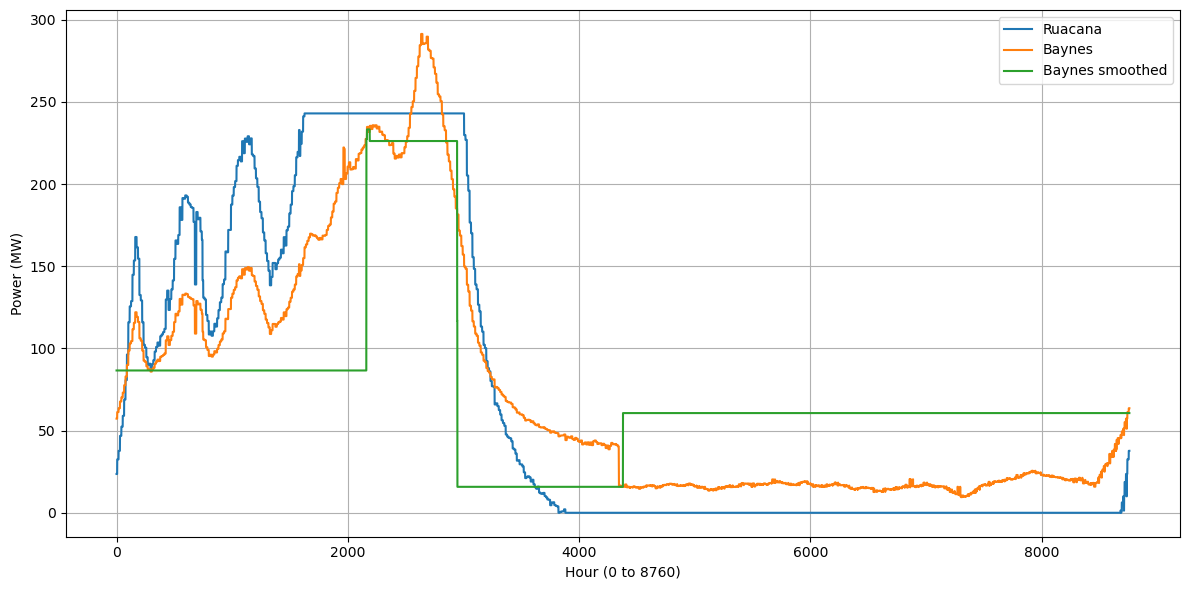

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['ruacana'], label='Ruacana')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes'], label='Baynes')
plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_smoothed_v2'], label='Baynes smoothed')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_storage'], label='Baynes storage')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_stored'], label='Baynes stored')
# plt.plot(hydro_namibia.reset_index(drop=True).index, hydro_namibia['baynes_out_of_storage'], label='Baynes out of storage')
plt.xlabel('Hour (0 to 8760)')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
seasons_dict = {
    1: 1,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
    6: 2,
    7: 3,
    8: 3,
    9: 3,
    10: 4,
    11: 4,
    12: 4
}  # grouping months into 4 seasons, to define according to user
hydro_namibia.reset_index(inplace=True)
hydro_namibia['season'] = hydro_namibia.apply(lambda row: seasons_dict[row['month']], axis=1)
hydro_namibia.groupby(['season'])[['baynes', 'baynes_smoothed_v2']].sum().reset_index()  # getting average capacity factor across seasons


,season,baynes,baynes_smoothed_v2
0,1,289895.7600,187027.841836
1,2,282230.4744,200101.992346
2,3,36365.1540,132334.783172
3,4,44885.7444,133950.298410
